# The `io` module

The `io` module enables loading of different input formats and conversion to different output formats.

Currently the following input/output formats are supported:


| Input | Output |
| :--- | :--- |
| _mol2_ (file, text) | `pandas.DataFrame` |
| _pdb_ (file, text) | `pandas.DataFrame` |
| _mol2_ (file, text) | `rdkit.Chem.rdchem.Mol` |
| _pdb_ (file) | `Bio.PDB.Structure.Structure` |

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from opencadd.io.dataframe import DataFrame
from opencadd.io.rdkit import Rdkit
from opencadd.io.biopython import Biopython


In [3]:
from pathlib import Path
DATA_PATH = Path("../../opencadd/tests/data/io") 

In [4]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

## Load structural data as `DataFrame`

Return data from different input formats as DataFrame with the following __default__ columns:

- `atom.id`: Atom serial number.
- `atom.name`: Atom name.
- `atom.x`, `atom.y`, `atom.z`: Orthogonal coordinates for X, Y, Z in Angstroms.
- `atom.charge`: Atom charge.
- `residue.pdb_id`: Residue PDB ID.
- `residue.name`: Residue name.

It is also possible to return a DataFrame in the __verbose__ version, that contains additional columns available in the input format (but not in other input formats).

Columns available from the _mol2_ format only are:

- `atom.type`: SYBYL atom type set in the _mol2_ format.
- `residue.subst_id`: ID number of the substructure containing the atom.
- `residue.subst_name`: Name of the substructure containing the atom: Residue name + residue PDB ID.

Columns available in the _pdb_ format only are:

- `record.name`: Record name set in the _pdb_ format, i.e. `ATOM` or `HETATM`.
- `atom.symbol`: Atom symbol.
- `atom.occupancy`: Atom occupancy.
- `atom.bfactor`: Atom B factor.
- `atom.alternative_model`: Alternative atom positions.
- `structure.chain`: Structure chain.

### From the _mol2_ format

Check out the _mol2_ format [here](http://rasbt.github.io/biopandas/tutorials/Working_with_MOL2_Structures_in_DataFrames/#the-mol2-data-format). 

__From _mol2_ files__: Return a _mol2_ file's content as DataFrame (_mol2_ files can have 9 (default) or 10 columns).

In [5]:
# Mol2 files with 10 columns
DataFrame.from_file(DATA_PATH / "2itz_chainA_protein.mol2")

atom.id atom.name  atom.x     atom.y     atom.z residue.id residue.name
0           1         N  3.5231  35.933102  15.596400        697          GLU
1           2        H1  3.0492  36.782101  15.323000        697          GLU
2           3        H2  3.1546  35.156300  15.066500        697          GLU
3           4        H3  4.5121  36.026001  15.414000        697          GLU
4           5        CA  3.3077  35.690701  17.044600        697          GLU
...       ...       ...     ...        ...        ...        ...          ...
4876     4877       HD2  3.5410  42.831100  42.216801       1019          PRO
4877     4878       HD3  1.9924  43.615398  42.610600       1019          PRO
4878     4879         N  3.6128  43.025902  38.110600       1020          GLN
4879     4880        H1  4.0174  42.840500  37.203999       1020          GLN
4880     4881        H2  4.1575  42.873901  38.947399       1020          GLN

[4881 rows x 7 columns]

In [6]:
# Mol2 files with 9 columns
DataFrame.from_file(DATA_PATH / "2itz_protein.mol2")

atom.id atom.name     atom.x     atom.y     atom.z residue.id  \
0           1         C -68.010002  -5.498000 -49.028000        697   
1           2         O -67.916000  -4.916000 -50.118999        697   
2           3        CA -67.651001  -6.991000 -48.900002        697   
3           4         N -67.939003  -7.787000 -50.118999        697   
4           5        CB -66.192001  -7.196000 -48.494999        697   
...       ...       ...        ...        ...        ...        ...   
4878     4879        H1 -55.506401 -10.457300 -32.785599       3035   
4879     4880        H2 -55.441399  -9.182800 -31.851601       3035   
4880     4881         O -58.311001 -15.659000 -30.250999       3045   
4881     4882        H1 -58.885601 -15.679400 -31.069201       3045   
4882     4883        H2 -57.761101 -16.492201 -30.310301       3045   

     residue.name  
0             GLU  
1             GLU  
2             GLU  
3             GLU  
4             GLU  
...           ...  
4878          HOH  
4879          HOH  
4880          HOH  
4881          HOH  
4882          HOH  

[4883 rows x 7 columns]

In order to get all columns from the input, set `verbose=True`.

In [7]:
DataFrame.from_file(DATA_PATH / "2itz_chainA_protein.mol2", verbose=True)

atom.id atom.name  atom.x     atom.y     atom.z residue.id residue.name  \
0           1         N  3.5231  35.933102  15.596400        697          GLU   
1           2        H1  3.0492  36.782101  15.323000        697          GLU   
2           3        H2  3.1546  35.156300  15.066500        697          GLU   
3           4        H3  4.5121  36.026001  15.414000        697          GLU   
4           5        CA  3.3077  35.690701  17.044600        697          GLU   
...       ...       ...     ...        ...        ...        ...          ...   
4876     4877       HD2  3.5410  42.831100  42.216801       1019          PRO   
4877     4878       HD3  1.9924  43.615398  42.610600       1019          PRO   
4878     4879         N  3.6128  43.025902  38.110600       1020          GLN   
4879     4880        H1  4.0174  42.840500  37.203999       1020          GLN   
4880     4881        H2  4.1575  42.873901  38.947399       1020          GLN   

     atom.type  residue.subst_id residue.subst_name  atom.charge  
0          N.4                 1             GLU697          1.0  
1            H                 1             GLU697          0.0  
2            H                 1             GLU697          0.0  
3            H                 1             GLU697          0.0  
4          C.3                 1             GLU697          0.0  
...        ...               ...                ...          ...  
4876         H               302            PRO1019          0.0  
4877         H               302            PRO1019          0.0  
4878      N.am               303            GLN1020          0.0  
4879         H               303            GLN1020          0.0  
4880         H               303            GLN1020          0.0  

[4881 rows x 11 columns]

__From _mol2_ text__: Return a _mol2_ string (text) as DataFrame. This functionality is useful if you are fetching data directly from a website like [PDB](https://www.rcsb.org/) or [KLIFS](https://klifs.vu-compmedchem.nl/).

In [8]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz_chainA_protein.mol2", "r") as f:
    text = f.read()

In [9]:
DataFrame.from_text(text, "mol2")

atom.id atom.name  atom.x     atom.y     atom.z residue.id residue.name
0           1         N  3.5231  35.933102  15.596400        697          GLU
1           2        H1  3.0492  36.782101  15.323000        697          GLU
2           3        H2  3.1546  35.156300  15.066500        697          GLU
3           4        H3  4.5121  36.026001  15.414000        697          GLU
4           5        CA  3.3077  35.690701  17.044600        697          GLU
...       ...       ...     ...        ...        ...        ...          ...
4876     4877       HD2  3.5410  42.831100  42.216801       1019          PRO
4877     4878       HD3  1.9924  43.615398  42.610600       1019          PRO
4878     4879         N  3.6128  43.025902  38.110600       1020          GLN
4879     4880        H1  4.0174  42.840500  37.203999       1020          GLN
4880     4881        H2  4.1575  42.873901  38.947399       1020          GLN

[4881 rows x 7 columns]

In [10]:
DataFrame.from_text(text, "mol2", verbose=True)

atom.id atom.name  atom.x     atom.y     atom.z residue.id residue.name  \
0           1         N  3.5231  35.933102  15.596400        697          GLU   
1           2        H1  3.0492  36.782101  15.323000        697          GLU   
2           3        H2  3.1546  35.156300  15.066500        697          GLU   
3           4        H3  4.5121  36.026001  15.414000        697          GLU   
4           5        CA  3.3077  35.690701  17.044600        697          GLU   
...       ...       ...     ...        ...        ...        ...          ...   
4876     4877       HD2  3.5410  42.831100  42.216801       1019          PRO   
4877     4878       HD3  1.9924  43.615398  42.610600       1019          PRO   
4878     4879         N  3.6128  43.025902  38.110600       1020          GLN   
4879     4880        H1  4.0174  42.840500  37.203999       1020          GLN   
4880     4881        H2  4.1575  42.873901  38.947399       1020          GLN   

     atom.type  residue.subst_id residue.subst_name  atom.charge  
0          N.4                 1             GLU697          1.0  
1            H                 1             GLU697          0.0  
2            H                 1             GLU697          0.0  
3            H                 1             GLU697          0.0  
4          C.3                 1             GLU697          0.0  
...        ...               ...                ...          ...  
4876         H               302            PRO1019          0.0  
4877         H               302            PRO1019          0.0  
4878      N.am               303            GLN1020          0.0  
4879         H               303            GLN1020          0.0  
4880         H               303            GLN1020          0.0  

[4881 rows x 11 columns]

### From the _pdb_ format

Check out the _pdb_ format [here](https://www.wwpdb.org/documentation/file-format-content/format33/sect9.html).

__From _pdb_ file__:  Return a _pdb_ file's content as DataFrame (`ATOM` and `HETATM` entries only). 

In [11]:
DataFrame.from_file(DATA_PATH / "2itz.pdb")

atom.id atom.name     atom.x     atom.y     atom.z residue.id  \
0           1         N -67.939003  -7.787000 -50.118999        697   
1           2        CA -67.651001  -6.991000 -48.900002        697   
2           3         C -68.010002  -5.498000 -49.028000        697   
3           4         O -67.916000  -4.916000 -50.118999        697   
4           5        CB -66.192001  -7.196000 -48.494999        697   
...       ...       ...        ...        ...        ...        ...   
2507     2509         O -54.306000   6.613000  -8.937000       3061   
2508     2510         O -54.908001  17.349001 -15.693000       3062   
2509     2511         O -61.183998  -5.126000 -41.009998       3063   
2510     2512         O -60.660999   8.159000 -21.872000       3064   
2511     2513         O -69.189003   8.275000 -36.944000       3065   

     residue.name  
0             GLU  
1             GLU  
2             GLU  
3             GLU  
4             GLU  
...           ...  
2507          HOH  
2508          HOH  
2509          HOH  
2510          HOH  
2511          HOH  

[2512 rows x 7 columns]

In order to get all columns from the input, set `verbose=True`.

In [12]:
DataFrame.from_file(DATA_PATH / "2itz.pdb", verbose=True)

atom.id atom.name     atom.x     atom.y     atom.z residue.id  \
0           1         N -67.939003  -7.787000 -50.118999        697   
1           2        CA -67.651001  -6.991000 -48.900002        697   
2           3         C -68.010002  -5.498000 -49.028000        697   
3           4         O -67.916000  -4.916000 -50.118999        697   
4           5        CB -66.192001  -7.196000 -48.494999        697   
...       ...       ...        ...        ...        ...        ...   
2507     2509         O -54.306000   6.613000  -8.937000       3061   
2508     2510         O -54.908001  17.349001 -15.693000       3062   
2509     2511         O -61.183998  -5.126000 -41.009998       3063   
2510     2512         O -60.660999   8.159000 -21.872000       3064   
2511     2513         O -69.189003   8.275000 -36.944000       3065   

     residue.name record.name atom.symbol  atom.occupancy  atom.bfactor  \
0             GLU        ATOM           N             1.0     62.040001   
1             GLU        ATOM           C             1.0     61.730000   
2             GLU        ATOM           C             1.0     60.290001   
3             GLU        ATOM           O             1.0     61.189999   
4             GLU        ATOM           C             1.0     62.389999   
...           ...         ...         ...             ...           ...   
2507          HOH      HETATM           O             1.0     66.239998   
2508          HOH      HETATM           O             1.0     58.820000   
2509          HOH      HETATM           O             1.0     37.119999   
2510          HOH      HETATM           O             1.0     48.790001   
2511          HOH      HETATM           O             1.0     44.000000   

     atom.alternative_model structure.chain  
0                                         A  
1                                         A  
2                                         A  
3                                         A  
4                                         A  
...                     ...             ...  
2507                                      A  
2508                                      A  
2509                                      A  
2510                                      A  
2511                                      A  

[2512 rows x 13 columns]

__From _pdb_ text__: Return a _pdb_ string (text) as DataFrame (`ATOM` and `HETATM` entries only). 

In [13]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz.pdb", "r") as f:
    text = f.read()

In [14]:
DataFrame.from_text(text, "pdb")

atom.id atom.name     atom.x     atom.y     atom.z residue.id  \
0           1         N -67.939003  -7.787000 -50.118999        697   
1           2        CA -67.651001  -6.991000 -48.900002        697   
2           3         C -68.010002  -5.498000 -49.028000        697   
3           4         O -67.916000  -4.916000 -50.118999        697   
4           5        CB -66.192001  -7.196000 -48.494999        697   
...       ...       ...        ...        ...        ...        ...   
2507     2509         O -54.306000   6.613000  -8.937000       3061   
2508     2510         O -54.908001  17.349001 -15.693000       3062   
2509     2511         O -61.183998  -5.126000 -41.009998       3063   
2510     2512         O -60.660999   8.159000 -21.872000       3064   
2511     2513         O -69.189003   8.275000 -36.944000       3065   

     residue.name  
0             GLU  
1             GLU  
2             GLU  
3             GLU  
4             GLU  
...           ...  
2507          HOH  
2508          HOH  
2509          HOH  
2510          HOH  
2511          HOH  

[2512 rows x 7 columns]

In [15]:
DataFrame.from_text(text, "pdb", verbose=True)

atom.id atom.name     atom.x     atom.y     atom.z residue.id  \
0           1         N -67.939003  -7.787000 -50.118999        697   
1           2        CA -67.651001  -6.991000 -48.900002        697   
2           3         C -68.010002  -5.498000 -49.028000        697   
3           4         O -67.916000  -4.916000 -50.118999        697   
4           5        CB -66.192001  -7.196000 -48.494999        697   
...       ...       ...        ...        ...        ...        ...   
2507     2509         O -54.306000   6.613000  -8.937000       3061   
2508     2510         O -54.908001  17.349001 -15.693000       3062   
2509     2511         O -61.183998  -5.126000 -41.009998       3063   
2510     2512         O -60.660999   8.159000 -21.872000       3064   
2511     2513         O -69.189003   8.275000 -36.944000       3065   

     residue.name record.name atom.symbol  atom.occupancy  atom.bfactor  \
0             GLU        ATOM           N             1.0     62.040001   
1             GLU        ATOM           C             1.0     61.730000   
2             GLU        ATOM           C             1.0     60.290001   
3             GLU        ATOM           O             1.0     61.189999   
4             GLU        ATOM           C             1.0     62.389999   
...           ...         ...         ...             ...           ...   
2507          HOH      HETATM           O             1.0     66.239998   
2508          HOH      HETATM           O             1.0     58.820000   
2509          HOH      HETATM           O             1.0     37.119999   
2510          HOH      HETATM           O             1.0     48.790001   
2511          HOH      HETATM           O             1.0     44.000000   

     atom.alternative_model structure.chain  
0                                         A  
1                                         A  
2                                         A  
3                                         A  
4                                         A  
...                     ...             ...  
2507                                      A  
2508                                      A  
2509                                      A  
2510                                      A  
2511                                      A  

[2512 rows x 13 columns]

Column types:

In [16]:
DataFrame.from_file(DATA_PATH / "2itz_chainA_protein.mol2", verbose=True).dtypes

atom.id                 int32
atom.name              string
atom.x                float32
atom.y                float32
atom.z                float32
residue.id             string
residue.name           string
atom.type              string
residue.subst_id        Int64
residue.subst_name     string
atom.charge           float32
dtype: object

In [17]:
DataFrame.from_file(DATA_PATH / "2itz.pdb", verbose=True).dtypes

atom.id                     int32
atom.name                  string
atom.x                    float32
atom.y                    float32
atom.z                    float32
residue.id                 string
residue.name               string
record.name                string
atom.symbol                string
atom.occupancy            float32
atom.bfactor              float32
atom.alternative_model     string
structure.chain            string
dtype: object

## Load structural data as `rdkit` molecule

__Note__: `rdkit` is a cheminformatics toolkit that focuses on working with small molecules. Technically you can load protein structures as `rdkit` molecule, however we recommend to use this data structure for small molecules only.

### From the _mol2_ format

__From _mol2_ files__: Return a _mol2_ file's content as DataFrame (_mol2_ files can have 9 (default) or 10 columns).

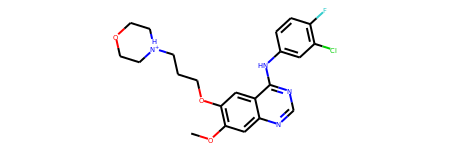

In [18]:
Rdkit.from_file(DATA_PATH / "2itz_chainA_ligand.mol2")

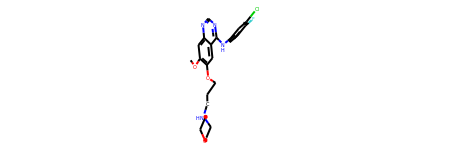

In [19]:
Rdkit.from_file(DATA_PATH / "2itz_chainA_ligand.mol2", compute2d=False)

__From _mol2_ text__: Return a _mol2_ string (text) as DataFrame. This functionality is useful if you are fetching data directly from a website like [KLIFS](https://klifs.net/).

In [20]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz_chainA_ligand.mol2", "r") as f:
    text = f.read()

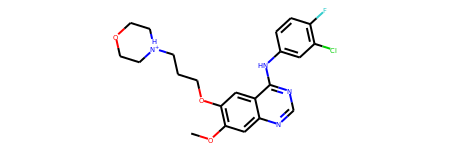

In [21]:
Rdkit.from_text(text, "mol2")

## Load structural data as `biopython`'s `Structure` objects

In [22]:
structure = Biopython.from_file(DATA_PATH / "2itz.pdb")
structure

<Structure id=>

In [23]:
type(structure)

Bio.PDB.Structure.Structure

In [24]:
print(f"Number of residues: {len(list(structure.get_residues()))}")

Number of residues: 370
